In [4]:
#Functions
def compute_average(runs,dismissals):
    if dismissals == 0:
        return runs/1
    else:
        return runs/dismissals

In [6]:
runs = 63
dismissals = 0

print(compute_average(runs,dismissals))

63.0


In [9]:
#for loop. Over and balls
for Over in range(0,2):
    for Ball in range(0,7):
        print('Over : ',Over,' Ball : ',Ball, 'Ball No : ' ,str(Over) +'.'+ str(Ball)) 

Over :  0  Ball :  0 Ball No :  0.0
Over :  0  Ball :  1 Ball No :  0.1
Over :  0  Ball :  2 Ball No :  0.2
Over :  0  Ball :  3 Ball No :  0.3
Over :  0  Ball :  4 Ball No :  0.4
Over :  0  Ball :  5 Ball No :  0.5
Over :  0  Ball :  6 Ball No :  0.6
Over :  1  Ball :  0 Ball No :  1.0
Over :  1  Ball :  1 Ball No :  1.1
Over :  1  Ball :  2 Ball No :  1.2
Over :  1  Ball :  3 Ball No :  1.3
Over :  1  Ball :  4 Ball No :  1.4
Over :  1  Ball :  5 Ball No :  1.5
Over :  1  Ball :  6 Ball No :  1.6


In [19]:
#lambda function: Anonymous function or funtion with no name
# lambda input:output form
f1 = lambda x: x + 10

In [21]:
f1(2)

12

In [31]:
#List
ls2 = [1,2,3,4,4]
for i in ls2:
    print(i*i)
    

1
4
9
16
16


In [32]:
# The above for loop can be written in one line itself
#[Expression for i in List_name]
ls3 = [i*i for i in ls2]
ls3

[1, 4, 9, 16, 16]

In [33]:
#we just cannot use unique alway, hence make use of set which functions exactly like unique
set(ls3)


{1, 4, 9, 16}

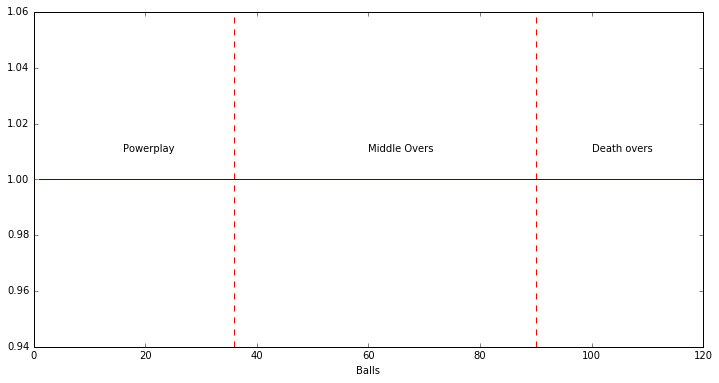

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
#balls
plt.figure(figsize =(12,6))
x = [i for i in range(1,121)]
y=  [1 for i in range(1,121)]
#end of powerplay
plt.axvline(x=36, c='r',ls ='--')
#end of mid overs
plt.axvline(x=90, c='r',ls ='--')
plt.xlabel('Balls')

plt.text(16,1.01,"Powerplay")
plt.text(60,1.01,"Middle Overs")
plt.text(100,1.01,"Death overs")
plt.plot(x,y)


# Batting analysis

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [3]:
deliveries = pd.read_csv("C:\\Users\\SHETTS60\\Documents\\Python scripts\\Cricket analytics Materials\MSD Analysis\\deliveries.csv")
matches = pd.read_csv("C:\\Users\\SHETTS60\\Documents\\Python scripts\\Cricket analytics Materials\\MSD Analysis\\matches.csv")

In [4]:
df = deliveries.copy()

In [5]:
#Compute dot or not
#to use lambda make use of 'apply'. 
df['isDot'] = df['batsman_runs'].apply(lambda x:1 if x==0 else 0)
df['isOne'] = df['batsman_runs'].apply(lambda x:1 if x==1 else 0)
df['isTwo'] = df['batsman_runs'].apply(lambda x:1 if x==2 else 0)
df['isThree'] = df['batsman_runs'].apply(lambda x:1 if x==3 else 0)
df['isFour'] = df['batsman_runs'].apply(lambda x:1 if x==4 else 0)
df['isSix'] = df['batsman_runs'].apply(lambda x:1 if x==6 else 0)

In [6]:
# #To find out runs of a particular batsman
# df[df['batsman']== 'DA Warner' ].groupby(['batsman','match_id'])['batsman_runs'].sum()


In [7]:
#runs df
runs = pd.DataFrame(df.groupby(['batsman'])['batsman_runs'].sum()).rename(columns ={"batsman_runs":"runs"}).reset_index()
# #balls df
balls = pd.DataFrame(df.groupby(['batsman'])['match_id'].count()).rename(columns ={"match_id":"balls"}).reset_index()
# #Innings df. To find unique count of match_id make use of Lambda and Np methods
innings = pd.DataFrame(df.groupby(['batsman'])['match_id'].apply(lambda x: len(list(np.unique(x))))).rename(columns ={"match_id":"innings"}).reset_index()
#Dismissed df
dismissed = pd.DataFrame(df.groupby(['batsman'])['player_dismissed'].count()).rename(columns ={"player_dismissed":"dismissals"}).reset_index()
#sixes df
sixes = pd.DataFrame(df.groupby(['batsman'])['isSix'].sum()).rename(columns ={"isSix":"sixes"}).reset_index()
#Fours df
fours = pd.DataFrame(df.groupby(['batsman'])['isFour'].sum()).rename(columns ={"isFour":"fours"}).reset_index()

In [8]:
#only 2 columns can be merged at a time hence you can merge first 2 columns and then merge third column and so on..
#format merge(dataframe, on = '',how='')
mega = pd.merge(innings,runs, on ='batsman').merge(balls, on ='batsman').merge(dismissed,on ='batsman').merge(fours,on ='batsman').merge(sixes,on ='batsman')

In [26]:
#mega['RPI'] = mega['runs']/mega['innings']

#This can also be written as . Axis =1 means row wise calculation
mega['RPI'] = mega.apply(lambda x:(x['runs']/x['innings']), axis=1)


,batsman,innings,runs,balls,dismissals,fours,sixes,RPI
0,A Ashish Reddy,23,280,196,15,16,15,12.173913
1,A Chandila,2,4,7,1,0,0,2.000000


In [6]:
#Writing function for balls per dismissal since dismissal can be 0 hence if we divide the balls/Dismissals it will give infinity

def balls_per_dismissal(balls, dismissals):
    if dismissals > 0:
        return balls/dismissals
    else:
        return balls/1 
    
def balls_per_boundary(balls, boundaries):
    if boundaries > 0:
        return balls/boundaries
    else:
        return balls/1 

## 1.1 Overall stat of Player

In [7]:
#combining all into one Function

def playerStatistics(df):
    
    
    df['isDot'] = df['batsman_runs'].apply(lambda x:1 if x==0 else 0)
    df['isOne'] = df['batsman_runs'].apply(lambda x:1 if x==1 else 0)
    df['isTwo'] = df['batsman_runs'].apply(lambda x:1 if x==2 else 0)
    df['isThree'] = df['batsman_runs'].apply(lambda x:1 if x==3 else 0)
    df['isFour'] = df['batsman_runs'].apply(lambda x:1 if x==4 else 0)
    df['isSix'] = df['batsman_runs'].apply(lambda x:1 if x==6 else 0)
    
    runs = pd.DataFrame(df.groupby(['batsman'])['batsman_runs'].sum()).rename(columns ={"batsman_runs":"runs"}).reset_index()
    balls = pd.DataFrame(df.groupby(['batsman'])['match_id'].count()).rename(columns ={"match_id":"balls"}).reset_index()
    innings = pd.DataFrame(df.groupby(['batsman'])['match_id'].apply(lambda x: len(list(np.unique(x))))).rename(columns ={"match_id":"innings"}).reset_index()
    dismissed = pd.DataFrame(df.groupby(['batsman'])['player_dismissed'].count()).rename(columns ={"player_dismissed":"dismissals"}).reset_index()
    
    dots = pd.DataFrame(df.groupby(['batsman'])['isTwo'].sum()).rename(columns ={"isTwo":"dots"}).reset_index()
    ones = pd.DataFrame(df.groupby(['batsman'])['isOne'].sum()).rename(columns ={"isOne":"ones"}).reset_index()
    twos = pd.DataFrame(df.groupby(['batsman'])['isTwo'].sum()).rename(columns ={"isTwo":"twos"}).reset_index()
    threes = pd.DataFrame(df.groupby(['batsman'])['isThree'].sum()).rename(columns ={"isThree":"threes"}).reset_index()
    fours = pd.DataFrame(df.groupby(['batsman'])['isFour'].sum()).rename(columns ={"isFour":"fours"}).reset_index()
    sixes = pd.DataFrame(df.groupby(['batsman'])['isSix'].sum()).rename(columns ={"isSix":"sixes"}).reset_index()
    
    df = pd.merge(innings,runs, on ='batsman').merge(balls, on ='batsman').merge(dismissed,on ='batsman').merge(dots,on ='batsman').merge(ones,on ='batsman').merge(twos,on ='batsman').merge(threes,on ='batsman').merge(fours,on ='batsman').merge(sixes,on ='batsman')
   
    df['RPI'] = df.apply(lambda x:(x['runs']/x['innings']), axis=1)
    
    #Strike rate
    df['SR'] = df.apply(lambda x:(100 * x['runs']/x['balls']), axis=1)
    #balls per dismissals
    df['BPD'] = df.apply(lambda x:balls_per_dismissal(x['balls'],x['dismissals']), axis=1)
    #balls Per boundary
    df['BPB'] = df.apply(lambda x: balls_per_boundary(x['balls'], (x['fours'] + x['sixes'])), axis = 1)
    return df

In [8]:
df = playerStatistics(df)
df

,batsman,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,RPI,SR,BPD,BPB
0,A Ashish Reddy,23,280,196,15,20,83,20,1,16,15,12.173913,142.857143,13.066667,6.322581
1,A Chandila,2,4,7,1,0,4,0,0,0,0,2.000000,57.142857,7.000000,7.000000
2,A Chopra,6,53,75,5,2,21,2,0,7,0,8.833333,70.666667,15.000000,10.714286
3,A Choudhary,3,25,20,2,1,13,1,0,1,1,8.333333,125.000000,10.000000,10.000000
4,A Dananjaya,1,4,5,0,1,2,1,0,0,0,4.000000,80.000000,5.000000,5.000000
5,A Flintoff,3,62,57,2,2,23,2,1,5,2,20.666667,108.771930,28.500000,8.142857
6,A Hales,6,152,119,6,10,44,10,0,13,6,25.333333,127.731092,19.833333,6.263158
7,A Joseph,1,15,13,0,2,3,2,0,2,0,15.000000,115.384615,13.000000,6.500000
8,A Kumble,15,35,49,2,1,21,1,0,3,0,2.333333,71.428571,24.500000,16.333333
9,A Mishra,54,368,410,30,22,174,22,0,30,5,6.814815,89.756098,13.666667,11.714286


In [22]:
a = deliveries[deliveries['batsman']=="A Ashish Reddy"]['match_id'].unique()
len(a)

23

## 1.2 Performance in different phases of play

In [21]:
#Common across all the KPI , writing for my purpose
deliveries = pd.read_csv("C:\\Users\\SHETTS60\\Documents\\Python scripts\\Cricket analytics Materials\MSD Analysis\\deliveries.csv")
matches = pd.read_csv("C:\\Users\\SHETTS60\\Documents\\Python scripts\\Cricket analytics Materials\\MSD Analysis\\matches.csv")
df = deliveries.copy()

def balls_per_dismissal(balls, dismissals):
    if dismissals > 0:
        return balls/dismissals
    else:
        return balls/1 
    
def balls_per_boundary(balls, boundaries):
    if boundaries > 0:
        return balls/boundaries
    else:
        return balls/1 

In [22]:
def phase(over):
    if over <= 6:
        return 'Powerplay'
    elif over <= 15:
        return 'Middle'
    else:
        return 'Death'

In [23]:
df['Phase'] = df["over"].apply(lambda x:phase(x))

In [24]:
#combining all into one Function

def phasesOfplay(df, current_phase):
    
    df = df[df["Phase"] == current_phase]
    df.reset_index(inplace = True, drop = True)
    
    df['isDot'] = df['batsman_runs'].apply(lambda x:1 if x==0 else 0)
    df['isOne'] = df['batsman_runs'].apply(lambda x:1 if x==1 else 0)
    df['isTwo'] = df['batsman_runs'].apply(lambda x:1 if x==2 else 0)
    df['isThree'] = df['batsman_runs'].apply(lambda x:1 if x==3 else 0)
    df['isFour'] = df['batsman_runs'].apply(lambda x:1 if x==4 else 0)
    df['isSix'] = df['batsman_runs'].apply(lambda x:1 if x==6 else 0)
    
    runs = pd.DataFrame(df.groupby(['batsman'])['batsman_runs'].sum()).rename(columns ={"batsman_runs":"runs"}).reset_index()
    balls = pd.DataFrame(df.groupby(['batsman'])['match_id'].count()).rename(columns ={"match_id":"balls"}).reset_index()
    innings = pd.DataFrame(df.groupby(['batsman'])['match_id'].apply(lambda x: len(list(np.unique(x))))).rename(columns ={"match_id":"innings"}).reset_index()
    dismissed = pd.DataFrame(df.groupby(['batsman'])['player_dismissed'].count()).rename(columns ={"player_dismissed":"dismissals"}).reset_index()
    
    dots = pd.DataFrame(df.groupby(['batsman'])['isTwo'].sum()).rename(columns ={"isTwo":"dots"}).reset_index()
    ones = pd.DataFrame(df.groupby(['batsman'])['isOne'].sum()).rename(columns ={"isOne":"ones"}).reset_index()
    twos = pd.DataFrame(df.groupby(['batsman'])['isTwo'].sum()).rename(columns ={"isTwo":"twos"}).reset_index()
    threes = pd.DataFrame(df.groupby(['batsman'])['isThree'].sum()).rename(columns ={"isThree":"threes"}).reset_index()
    fours = pd.DataFrame(df.groupby(['batsman'])['isFour'].sum()).rename(columns ={"isFour":"fours"}).reset_index()
    sixes = pd.DataFrame(df.groupby(['batsman'])['isSix'].sum()).rename(columns ={"isSix":"sixes"}).reset_index()
    
    df = pd.merge(innings,runs, on ='batsman').merge(balls, on ='batsman').merge(dismissed,on ='batsman').merge(dots,on ='batsman').merge(ones,on ='batsman').merge(twos,on ='batsman').merge(threes,on ='batsman').merge(fours,on ='batsman').merge(sixes,on ='batsman')
   
    df['RPI'] = df.apply(lambda x:(x['runs']/x['innings']), axis=1)
    
    #Strike rate
    df['SR'] = df.apply(lambda x:(100 * x['runs']/x['balls']), axis=1)
    #balls per dismissals
    df['BPD'] = df.apply(lambda x:balls_per_dismissal(x['balls'],x['dismissals']), axis=1)
    #balls Per boundary
    df['BPB'] = df.apply(lambda x: balls_per_boundary(x['balls'], (x['fours'] + x['sixes'])), axis = 1)
    return df

In [25]:
pp_df = phasesOfplay(df, 'Powerplay')
mid_df = phasesOfplay(df, 'Middle')
dth_df = phasesOfplay(df, 'Death')

In [26]:
dth_df.head(2)

,batsman,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,RPI,SR,BPD,BPB
0,A Ashish Reddy,22,214,148,14,15,69,15,1,13,10,9.727273,144.594595,10.571429,6.434783
1,A Chandila,2,4,7,1,0,4,0,0,0,0,2.000000,57.142857,7.000000,7.000000


## 1.3 Performance by Bat 1st/2nd

In [27]:
#Common across all the KPI , writing for my purpose
deliveries = pd.read_csv("C:\\Users\\SHETTS60\\Documents\\Python scripts\\Cricket analytics Materials\MSD Analysis\\deliveries.csv")
matches = pd.read_csv("C:\\Users\\SHETTS60\\Documents\\Python scripts\\Cricket analytics Materials\\MSD Analysis\\matches.csv")
df = deliveries.copy()

def balls_per_dismissal(balls, dismissals):
    if dismissals > 0:
        return balls/dismissals
    else:
        return balls/1 
    
def balls_per_boundary(balls, boundaries):
    if boundaries > 0:
        return balls/boundaries
    else:
        return balls/1 

In [28]:
#combining all into one Function

def ByInnings(df, current_innings):
    
    df = df[df['inning'] == current_innings]
    df.reset_index(inplace = True, drop =True)
    
    
    df['isDot'] = df['batsman_runs'].apply(lambda x:1 if x==0 else 0)
    df['isOne'] = df['batsman_runs'].apply(lambda x:1 if x==1 else 0)
    df['isTwo'] = df['batsman_runs'].apply(lambda x:1 if x==2 else 0)
    df['isThree'] = df['batsman_runs'].apply(lambda x:1 if x==3 else 0)
    df['isFour'] = df['batsman_runs'].apply(lambda x:1 if x==4 else 0)
    df['isSix'] = df['batsman_runs'].apply(lambda x:1 if x==6 else 0)
    
    runs = pd.DataFrame(df.groupby(['batsman'])['batsman_runs'].sum()).rename(columns ={"batsman_runs":"runs"}).reset_index()
    balls = pd.DataFrame(df.groupby(['batsman'])['match_id'].count()).rename(columns ={"match_id":"balls"}).reset_index()
    innings = pd.DataFrame(df.groupby(['batsman'])['match_id'].apply(lambda x: len(list(np.unique(x))))).rename(columns ={"match_id":"innings"}).reset_index()
    dismissed = pd.DataFrame(df.groupby(['batsman'])['player_dismissed'].count()).rename(columns ={"player_dismissed":"dismissals"}).reset_index()
    dots = pd.DataFrame(df.groupby(['batsman'])['isDot'].sum()).rename(columns ={"isDot":"dots"}).reset_index()
    ones = pd.DataFrame(df.groupby(['batsman'])['isOne'].sum()).rename(columns ={"isOne":"ones"}).reset_index()
    twos = pd.DataFrame(df.groupby(['batsman'])['isTwo'].sum()).rename(columns ={"isTwo":"twos"}).reset_index()
    threes = pd.DataFrame(df.groupby(['batsman'])['isThree'].sum()).rename(columns ={"isThree":"threes"}).reset_index()
    sixes = pd.DataFrame(df.groupby(['batsman'])['isSix'].sum()).rename(columns ={"isSix":"sixes"}).reset_index()
    fours = pd.DataFrame(df.groupby(['batsman'])['isFour'].sum()).rename(columns ={"isFour":"fours"}).reset_index()
    
    df = pd.merge(innings,runs, on ='batsman').merge(balls, on ='batsman').merge(dismissed,on ='batsman').merge(dots,on ='batsman').merge(ones,on ='batsman').merge(twos,on ='batsman').merge(threes,on ='batsman').merge(fours,on ='batsman').merge(sixes,on ='batsman')
   
    df['RPI'] = df.apply(lambda x:(x['runs']/x['innings']), axis=1)
    
    #Strike rate
    df['SR'] = df.apply(lambda x:(100 * x['runs']/x['balls']), axis=1)
    #balls per dismissals
    df['BPD'] = df.apply(lambda x:balls_per_dismissal(x['balls'],x['dismissals']), axis=1)
    #balls Per boundary
    df['BPB'] = df.apply(lambda x: balls_per_boundary(x['balls'], (x['fours'] + x['sixes'])), axis = 1)
    return df

In [29]:
ing1_df = ByInnings(df, 1)
ing2_df = ByInnings(df, 2)

In [30]:
comb = pd.merge(ing1_df,ing2_df, on ='batsman')
comb.head(2)
#You can rename the column

,batsman,innings_x,runs_x,balls_x,dismissals_x,dots_x,ones_x,twos_x,threes_x,fours_x,sixes_x,RPI_x,SR_x,BPD_x,BPB_x,innings_y,runs_y,balls_y,dismissals_y,dots_y,ones_y,twos_y,threes_y,fours_y,sixes_y,RPI_y,SR_y,BPD_y,BPB_y
0,A Ashish Reddy,13,166,115,7,13,53,13,1,6,10,12.769231,144.347826,16.428571,7.187500,10,114,81,8,7,30,7,0,10,5,11.4,140.740741,10.125,5.4
1,A Chopra,5,51,72,4,2,19,2,0,7,0,10.200000,70.833333,18.000000,10.285714,1,2,3,1,0,2,0,0,0,0,2.0,66.666667,3.000,3.0


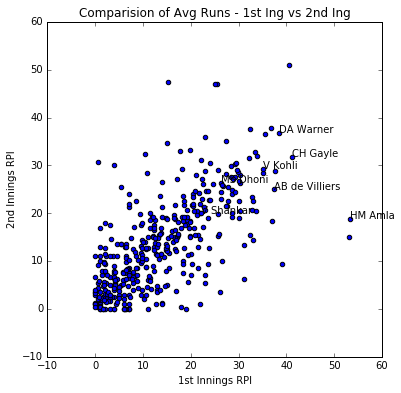

In [71]:

plt.figure(figsize = (6, 6))
plt.scatter(comb['RPI_x'],comb['RPI_y'])
plt.xlabel('1st Innings RPI')
plt.ylabel('2nd Innings RPI')
plt.title('Comparision of Avg Runs - 1st Ing vs 2nd Ing')

annotations=list(comb['batsman'])
selected_players = ['CH Gayle', 'V Kohli', 'AB de Villiers', 'DA Warner', 'V Shankar', 'HM Amla', 'MS Dhoni']

for i, label in enumerate(annotations):
    if label in selected_players:
        plt.annotate(label, (comb['RPI_x'][i], comb['RPI_y'][i]))
plt.show()

# Problem Statement: How good is player X against MI in Wankhede when they’re playing 3 spinners?

### Filters in our problem statement:
- Stadium = 'Wankhede Stadium'
- Phase = 'Middle Overs'
- Oppostion Team = 'Mumbai Indians'

In [1]:
deliveries = pd.read_csv("C:\\Users\\SHETTS60\\Documents\\Python scripts\\Cricket analytics Materials\MSD Analysis\\deliveries.csv")
matches = pd.read_csv("C:\\Users\\SHETTS60\\Documents\\Python scripts\\Cricket analytics Materials\\MSD Analysis\\matches.csv")

NameError: name 'pd' is not defined

In [70]:
df = deliveries.copy()
mdf = matches.copy()

In [71]:
#To get venue details we have to merge the matches dataset to Deliveries dataset
#To combine them , common column should have same name(id)
mdf = mdf.rename(columns ={"id":"match_id"})

In [72]:
combdf = pd.merge(df,mdf, on = "match_id", how = "left")

In [73]:

def balls_per_dismissal(balls, dismissals):
    if dismissals > 0:
        return balls/dismissals
    else:
        return balls/1 
    
def balls_per_boundary(balls, boundaries):
    if boundaries > 0:
        return balls/boundaries
    else:
        return balls/1 

In [74]:
def phase(over):
    if over <= 6:
        return 'Powerplay'
    elif over <= 15:
        return 'Middle'
    else:
        return 'Death'

In [75]:
combdf['phase'] = combdf["over"].apply(lambda x:phase(x))

In [76]:
combdf.head(1)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,phase
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,Powerplay


In [79]:
#combining all into one Function

def ByCustom(df, current_venue, current_phase, current_opposition):
    df = df[df.venue == current_venue]
    df = df[df.phase == current_phase]
    df = df[df.bowling_team == current_opposition]
    df.reset_index(inplace = True, drop = True)
    
    df['isDot'] = df['batsman_runs'].apply(lambda x: 1 if x == 0 else 0)
    df['isOne'] = df['batsman_runs'].apply(lambda x: 1 if x == 1 else 0)
    df['isTwo'] = df['batsman_runs'].apply(lambda x: 1 if x == 2 else 0)
    df['isThree'] = df['batsman_runs'].apply(lambda x: 1 if x == 3 else 0)
    df['isFour'] = df['batsman_runs'].apply(lambda x: 1 if x == 4 else 0)
    df['isSix'] = df['batsman_runs'].apply(lambda x: 1 if x == 6 else 0)
    
    runs = pd.DataFrame(df.groupby(['batsman'])['batsman_runs'].sum()).rename(columns ={"batsman_runs":"runs"}).reset_index()
    balls = pd.DataFrame(df.groupby(['batsman'])['match_id'].count()).rename(columns ={"match_id":"balls"}).reset_index()
    innings = pd.DataFrame(df.groupby(['batsman'])['match_id'].apply(lambda x: len(list(np.unique(x))))).rename(columns ={"match_id":"innings"}).reset_index()
    dismissed = pd.DataFrame(df.groupby(['batsman'])['player_dismissed'].count()).rename(columns ={"player_dismissed":"dismissals"}).reset_index()
    
    dots = pd.DataFrame(df.groupby(['batsman'])['isDot'].sum()).rename(columns ={"isDot":"dots"}).reset_index()
    ones = pd.DataFrame(df.groupby(['batsman'])['isOne'].sum()).rename(columns ={"isOne":"ones"}).reset_index()
    twos = pd.DataFrame(df.groupby(['batsman'])['isTwo'].sum()).rename(columns ={"isTwo":"twos"}).reset_index()
    threes = pd.DataFrame(df.groupby(['batsman'])['isThree'].sum()).rename(columns ={"isThree":"threes"}).reset_index()
    fours = pd.DataFrame(df.groupby(['batsman'])['isFour'].sum()).rename(columns ={"isFour":"fours"}).reset_index()
    sixes = pd.DataFrame(df.groupby(['batsman'])['isSix'].sum()).rename(columns ={"isSix":"sixes"}).reset_index()
    
    df = pd.merge(innings,runs, on ='batsman').merge(balls, on ='batsman').merge(dismissed,on ='batsman').merge(dots,on ='batsman').merge(ones,on ='batsman').merge(twos,on ='batsman').merge(threes,on ='batsman').merge(fours,on ='batsman').merge(sixes,on ='batsman')
   
    df['RPI'] = df.apply(lambda x:(x['runs']/x['innings']), axis=1)
    
    #Strike rate
    df['SR'] = df.apply(lambda x:(100 * x['runs']/x['balls']), axis=1)
    #balls per dismissals
    df['BPD'] = df.apply(lambda x:balls_per_dismissal(x['balls'],x['dismissals']), axis=1)
    #balls Per boundary
    df['BPB'] = df.apply(lambda x: balls_per_boundary(x['balls'], (x['fours'] + x['sixes'])), axis = 1)
    #dot Percentage
    df['dot_percentage'] = df.apply(lambda x: x['dots']/x['balls'], axis = 1)
    return df

In [80]:
df = ByCustom(combdf, "Wankhede Stadium", "Middle", "Mumbai Indians")

In [81]:
df.head(2)

,batsman,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,RPI,SR,BPD,BPB,dot_percentage
0,A Ashish Reddy,1,10,8,0,4,2,1,0,0,1,10.0,125.000000,8.0,8.0,0.500000
1,AB Agarkar,1,15,14,1,6,5,1,0,2,0,15.0,107.142857,14.0,7.0,0.428571


In [82]:
df.sort_values(["RPI", "SR"], ascending = (False, False)).head(2)

,batsman,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,RPI,SR,BPD,BPB,dot_percentage
57,JC Buttler,2,131,59,1,11,23,5,0,11,9,65.5,222.033898,59.0,2.950,0.186441
94,OA Shah,1,58,33,1,9,12,4,0,5,3,58.0,175.757576,33.0,4.125,0.272727
